# **Overview: Movie Recommendation** 


#### In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.…ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you?

#### …it's not just a guess drawn out of the hat. There is an algorithm behind it.


# **Problem Statement**

#### With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

#### What value is achieved through building a functional recommender system?Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.


#### This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

#### For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

<a id="cont"></a>

# **Table of Contents**

<details>
<summary><a href=#one>1. Importing Packages</a></summary>
<br>
<a href=#one.one>1.1 Importing python packages that will be used in the notebook </a>
</details>

<br>

<details>
<summary><a href=#two>2. Loading Data</a></summary>
<br>
<a href=#two.one>2.1 Loading the Train and Test datasets</a>
</details>

<br>

<details>
<summary><a href=#three>3. Exploratory Data Analysis (EDA)</a></summary>
<br>
<a href=#three.one>3.1 Why is EDA important?</a>
<br>
<a href=#three.two>3.2 Pandas profiling model</a>
<br>
<a href=#three.three>3.3 Generating a word cloud</a>
<br>
<a href=#three.four>3.4 Looking at the data types of the Train and Test datasets</a>
<br>
<a href=#three.five>3.5 Looking for null values in the Train and Test datasets</a>
<br>
<a href=#three.six>3.6 Investigating the distribution of categorical values</a>
<br>
<a href=#three.seven> 3.7  Hashtags for each sentiment</a>
</details>

<br>

<details>
<summary><a href=#four>4. Data Engineering</a></summary>
<br>
<a href=#four.one>4.1 A copy of each dataset </a>
<br>
<a href=#four.two>4.2 Function to make all text lowercase </a>
<br>
<a href=#four.three>4.3 Function to remove URLs </a>
<br>
<a href=#four.four>4.4 Removing special characters </a>
<br>
<a href=#four.five>4.5 Removing punctuation </a>
<br>
<a href=#four.six>4.6 Removing digits</a>
<br>
<a href=#four.seven>4.7 Removing stopwords </a>
<br>
<a href=#four.eight>4.8 Tokenization </a>
<br>
<a href=#four.nine>4.9 Lemmatization </a>
<br>
<a href=#four.ten>4.10 Datasets after cleaning </a>
<br>
<a href=#four.eleven>4.11 Analysis of data after cleaning </a>
</details>

<br>

<details>
<summary><a href=#four>5. Modeling</a></summary>
<br>
<a href=#five.one>5.1 Splitting the x variable from the tartget variable </a>
<br>
<a href=#five.two>5.2 Turning text into something the model can read </a>
<br>
<a href=#five.three>5.3 Splitting the data into Train and validation set </a>
<br>
<a href=#four.four>4.4 Training the model and evaluating the model with the validation set </a>
<br>
<a href=#five.five>5.5 Logistic Regression model </a>
<br>
<a href=#five.six>5.6 Random Forest model </a>
<br>
<a href=#five.seven>5.7 Naive model</a>
<br>
<a href=#five.eight>5.8 SVC model </a>
<br>
<a href=#five.nine>5.9 KNN model </a>
<br>
<a href=#five.ten>5.10 Test set preperation and saving the best model </a>
<br>
<a href=#five.eleven>5.11 Test predicitions </a>
<br>
<a href=#five.twelve>5.12 CSV conversion </a>
</details>

<br>

<details>
<summary><a href=#six>6. Model performance</a></summary>
<br>
<a href=#six.one>6.1 What is performance analysis in machine learning</a>
<br>
<a href=#six.two>6.2 Evaluation of model</a>
<br>
<a href=#six.three>6.3 Assesment of the F-1 score according to both Train and Test sets </a>
<br>
<a href=#six.four>6.4 Analysing the dataframe</a>
<br>
<a href=#six.five>6.5 Plotting the F-1 Test performance from the Test data </a>
<br>
<a href=#six.six>6.6 Confusion matrix of the various models </a>
</details>

<br>

<details>
<summary><a href=#six>7. Model Explanations</a></summary>
<br>
<a href=#seven.one>7.1 Best performing model</a>
<br>
<a href=#seven.two>7.2 Conclusion</a>

 
 <a id="one"></a>
 
 # **1.Importing Packages**
<a href=#cont>Back to Table of Contents</a>

---
    
| *Description: Importing Packages*|
| :--------------------------- |
>In this section all the packages that may be needed during our analysis and the libraries that will be used throughout the analysis and modelling will be imported. 
 |

---

### <a id="one.one"></a>1.1 *Importing python packages that will be used in the notebook.*

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from time import time
import cufflinks as cf
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler


# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score, confusion_matrix,classification_report
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image, HTML
from surprise import Reader, Dataset
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import json
import datetime
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy
import heapq
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk import TreebankWordTokenizer, SnowballStemmer
from nltk.corpus import stopwords
import re
STOPWORDS = set(stopwords.words('english'))

# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

In [5]:
nltk.download(["punkt","stopwords","wordnet",'omw-1.4'])

[nltk_data] Downloading package punkt to C:\Users\PULENG
[nltk_data]     MLANGENI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\PULENG
[nltk_data]     MLANGENI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\PULENG
[nltk_data]     MLANGENI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\PULENG
[nltk_data]     MLANGENI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

<a id="two"></a>

 # **2. Loading the Data**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| *Description: Loading the data*  |
| :--------------------------- |
|
>In this section the  `all 8 data sets` will be loaded into the notebook.
 |

### <a id="two.one"></a> 2.1 *Loading all 8 data sets.*

In [2]:
# Loading the Train dataset
df_train = pd.read_csv("https://media.githubusercontent.com/media/LPTsilo/Team_ES2_Unsupervised_Predict/main/train.csv")
# Looking at how many rows and columns are in the dataset
df_train.shape

(10000038, 4)

In [7]:
# Loading Test dataset
df_test = pd.read_csv("https://media.githubusercontent.com/media/LPTsilo/Team_ES2_Unsupervised_Predict/main/test.csv")

# Looking at how many rows and columns are in the dataset
df_test.shape

(5000019, 2)

In [8]:
# Loading Genome_Scores dataset
df_genome_score = pd.read_csv('https://media.githubusercontent.com/media/LPTsilo/Team_ES2_Unsupervised_Predict/main/genome_scores.csv')

# Looking at how many rows and columns are in the dataset
df_genome_score.shape

(15584448, 3)

In [9]:
# Loading Genome_Tags dataset
df_genome_tags = pd.read_csv("https://media.githubusercontent.com/media/LPTsilo/Team_ES2_Unsupervised_Predict/main/genome_tags.csv")

# Looking at how many rows and columns are in the dataset
df_genome_tags.shape

(1128, 2)

In [10]:
# Loading imdb_data dataset
df_imdb_data = pd.read_csv("https://media.githubusercontent.com/media/LPTsilo/Team_ES2_Unsupervised_Predict/main/imdb_data.csv")

# Looking at how many rows and columns are in the dataset
df_imdb_data.shape

(27278, 6)

In [11]:
# Loading Links dataset
df_links = pd.read_csv("https://media.githubusercontent.com/media/LPTsilo/Team_ES2_Unsupervised_Predict/main/links.csv")

# Looking at how many rows and columns are in the dataset
df_links.shape

(62423, 3)

In [12]:
# Loading Movies dataset
df_movies  = pd.read_csv('https://media.githubusercontent.com/media/LPTsilo/Team_ES2_Unsupervised_Predict/main/movies.csv')

# Looking at how many rows and columns are in the dataset
df_movies.shape

(62423, 3)

In [13]:
# Loading Tags dataset
df_tags  = pd.read_csv('https://media.githubusercontent.com/media/LPTsilo/Team_ES2_Unsupervised_Predict/main/tags.csv')

# Looking at how many rows and columns are in the dataset
df_tags.shape

(1093360, 4)

<a id="three"></a>

# **3. Exploratory Data Analysis (EDA)**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|  *Description: Exploratory data analysis* |
| :--------------------------- |
| 
>In this section, there will be an in-depth analysis of all the variables in the dataframe. |

---

### <a id="three.one"></a> 3.1 *Why is EDA important?* 

&#10148; It helps to prepare the dataset for analysis. </br>
&#10148; It allows a machine learning model to predict the dataset better. </br>
&#10148; It gives more accurate results.  </br>
&#10148; It also helps with choosing a better machine learning model. </br>

### <a id="three.two"></a> 3.2  *Looking at the data types that are in the dataframes.* 
>*It can be seen there is int64, float64 and object type data*

In [14]:
# Train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [15]:
# Test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [16]:
# Genome Score dataset
df_genome_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [17]:
# Genome Tags dataset
df_genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [18]:
# imdb dataset
df_imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [19]:
# Links dataset
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [20]:
# Movies dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [21]:
# Tags dataset
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


### <a id="three.four"></a> 3.4 *Looking for null values in the datasets.*
>It can be seen that there are null values in the imdb,links and tags data sets

In [24]:
print("Train: ")
print(str(df_train.isnull().sum()))
print("=====================================")
print("Test: ")
print(str(df_test.isnull().sum()))
print("=====================================")
print("Movies: ")
print(str(df_movies.isnull().sum()))
print("=====================================")
print("Tags: ")
print(str(df_tags.isnull().sum()))
print("=====================================")
print("Links: ")
print(str(df_links.isnull().sum()))
print("=====================================")
print("IMDB: ")
print(str(df_imdb_data.isnull().sum()))
print("=====================================")
print("Genome scores: ")
print(str(df_genome_score.isnull().sum()))
print("=====================================")
print("Genome tags: ")
print(str(df_genome_tags.isnull().sum()))

Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Test: 
userId     0
movieId    0
dtype: int64
Movies: 
movieId    0
title      0
genres     0
dtype: int64
Tags: 
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
Genome tags: 
tagId    0
tag      0
dtype: int64


### <a id="three.five"></a> 3.5 *Looking how many movies and users are in the train dataset.*
>It can be seen that there are 162 541 users and 48 213 Movies in the train dataset


In [25]:
print('There are ',df_train["userId"].nunique(), 'users and',df_train.movieId.nunique(),'movies in the database/dataframe')

There are  162541 users and 48213 movies in the database/dataframe


In [26]:
def user_ratings_count(df, n):
    """
    Counts the number of user ratings.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        n (int): number of users to show
    Returns
    -------
        barplot (NoneType): barplot of top n users by number of observations
    """
    plt.figure(figsize=(8,6))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='brg', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()

Combined number of ratings:	 38970 
Total number of movies:		 48213


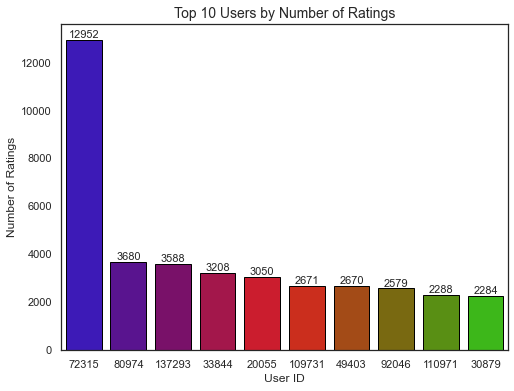

In [27]:
user_ratings_count(df_train,10)

Fig 1. User 72315 has rated an extreme number of movies relative to other users. For EDA purposes, this user is removed to make interpretation easier.

In [28]:
# Exclude user 72315 for EDA
df_train_eda = df_train[df_train['userId']!=72315]

Combined number of ratings:	 28296 
Total number of movies:		 45844


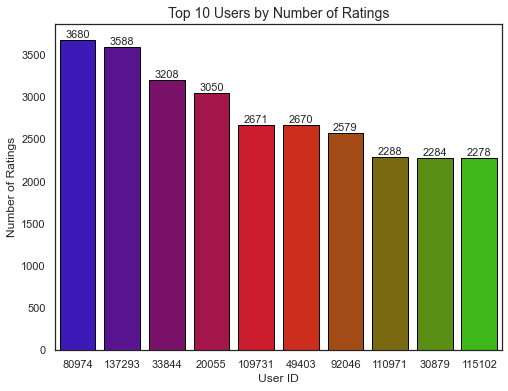

In [29]:
user_ratings_count(df_train_eda,10)

In [30]:
# How many movies were only rated by our outlier?
48213-45844

2369

Our user clearly rated quite a few movies. The loss of unique ratings indicates that he could've been the only person watching those movies. This would cause the recommender to use him as a baseline for those movies.

Lets see how do users tend to rate movies

you can get more colors codes [here]("https://www.color-hex.com/popular-colors.php")

### <a id="three.seven"></a> 3.7 *The train dataset gives an overview of how each user rated each movie. What was observed that each user can rate a movie from 0.5 (Worst) to 5.0 (Best). Here is the full detailed scale:*

- 0.5 - Very Bad
- 1.0 - Bad
- 1.5 - Moderately Bad
- 2.0 - Not that Bad
- 2.5 - Less than average
- 3.0 - Average
- 3.5 - Above than average
- 4.0 - Good
- 4.5 - Very Good

In [32]:
def ratings_distplot(df, column='rating'):
    """
    Plots the distribution of ratings in the dataset.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        column (str): column to plot
    Returns
    -------
        distplot (NoneType): distplot of rating frequencies
    """
    plt.figure(figsize=(8,6))
    ax = sns.distplot(df[f'{column}'],bins=10, kde=False, hist_kws=dict(alpha=0.6),color="#4D17A0")
    mean = df[f'{column}'].mean()
    median = df[f'{column}'].median()
    plt.axvline(x=mean, label = f'mean {round(mean,2)}' , color='#4D17A0', lw=3, ls = '--')
    plt.axvline(x=median, label = f'median {median}' , color='#4DA017', lw=3, ls = '--')
    plt.xlim((0.5,5))
    plt.ylim((0,2500000))
    plt.title(f'Distribution of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

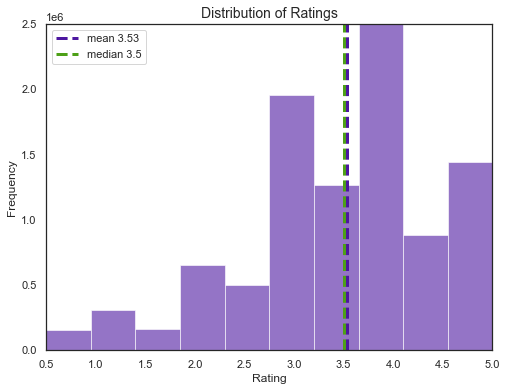

In [33]:
ratings_distplot(df_train_eda)

It is interesting that the ratings are left-skewed. It was expected that there would be a normal distrubtion with a mean rating of 3. Instead, we observe that users tend to rate movies quite favourably and tend to avoid negative ratings. This skew might be explained by the tendency of users to rate movies they liked. In other words, if a user doesn't like a movie, it is unlikely that they will watch it through to the end, let alone rate it.

Now lets see Is there a relationship between the number of ratings a movie has and how highly it is rated and also which are the best and worst rated movies of all time?

In [36]:
def mean_ratings_scatter(df, color='#4D17A0', column='userId'):
    """
    Make scatterplots of mean ratings.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        color (str): plot colour
        column (str): column to plot
    """
    plt.figure(figsize=(6,4))
    mean_ratings = df.groupby(f'{column}')['rating'].mean()
    user_counts = df.groupby(f'{column}')['movieId'].count().values
    sns.scatterplot(x=mean_ratings, y = user_counts, color=color)
    plt.title(f'Mean Ratings by Number of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Number of Ratings')
    plt.show()

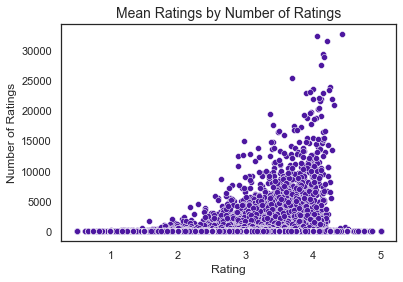

In [37]:
# Mean movie ratings by number of ratings
mean_ratings_scatter(df_train_eda, column='movieId')

it seems like The more ratings a movie has, the more highly it is likely to be rated. This confirms our intuitive understanding that the more highly rated a movie is, the more likely is that viewers will recommend the movie to each other. In other words, people generally try to avoid maing bad recommendations

Which are the best and worst rated movies of all time?

In [62]:
df_train_eda = df_train_eda[['movieId','userId','rating','timestamp']]

In [63]:
df_train_eda.head()

,movieId,userId,rating,timestamp
0,57669,5163,4.0,1518349992
1,5,106343,4.5,1206238739
2,5459,146790,5.0,1076215539
3,32296,106362,2.0,1423042565
4,366,9041,3.0,833375837


In [70]:
def plot_ratings(count, n, color='#4DA017', best=True, method='mean'):
    """
    Make scatterplots of ratings.
    Parameters
    ----------
        count (int): number of ratings threshold
        n (int): number of movies
        color (str): plot colour
        best (bool): column to plot
        method (str): statistical measure
    """
    # What are the best and worst movies
    # Creating a new DF with mean and count
    if method == 'mean':
        movie_avg_ratings = pd.DataFrame(df_train_eda.merge(df_movies, on='movieId', how='left').groupby(['movieId', 'title'])['rating'].mean())
    else:
        movie_avg_ratings = pd.DataFrame(df_train_eda.merge(df_movies, on='movieId', how='left').groupby(['movieId', 'title'])['rating'].median())
    movie_avg_ratings['count'] = df_train_eda.groupby('movieId')['userId'].count().values
    movie_avg_ratings.reset_index(inplace=True)
    movie_avg_ratings.set_index('movieId', inplace=True)

    # Remove movies that have been rated fewer than n times
    data = movie_avg_ratings[movie_avg_ratings['count']>count]
    data.sort_values('rating', inplace= True,ascending=False)
    if best == True:
        plot = data.head(n).sort_values('rating', ascending=False)
        title='Best Rated'
    else:
        plot = data.tail(n).sort_values('rating', ascending=True)
        title='Worst Rated'
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=plot['rating'], y=plot['title'], size=plot['count'], color=color)
    plt.xlabel('Rating')
    plt.ylabel('')
    plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
    plt.title(f'Top {n} {title} Movies with Over {count} Ratings', fontsize=14)
    plt.show()

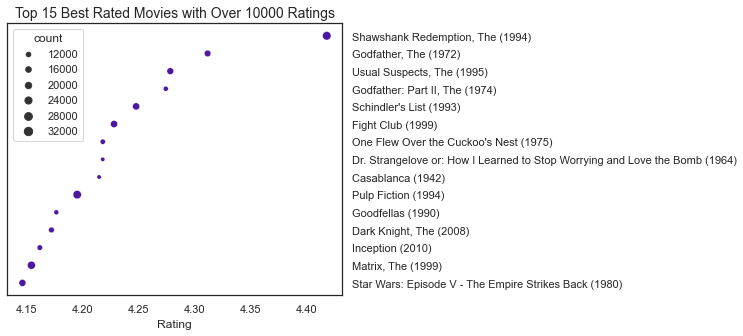

In [71]:
# What are the top 10 highest rated titles?
plot_ratings(10000, 15, '#4D17A0', True, 'mean')

By filtering movies with less than 10000 ratings, we find that the most popular movies are unsurprising titles. The Shawshank Redemption and The Godfather unsurprisingly top the list. What is interesting is that Movies made post 2000 don't feature often. Do users have a preference to Older movies?

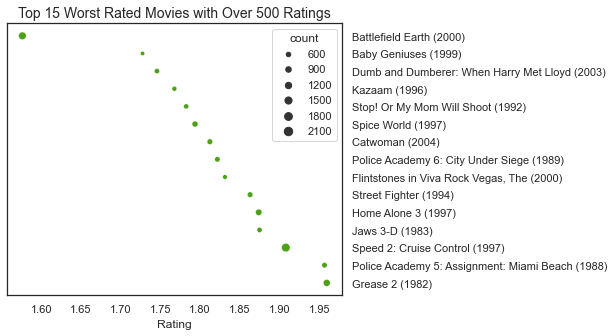

In [72]:
# What are the 10 worst rated titles?
plot_ratings(500, 15,'#4DA017', False, 'mean')

Obviously, people did not like Battlefield too much and with 1200 ratings, they really wanted it to be known. It is interesting how many sequels appear in the list

### <a id="three.six"></a> 3.6 *Creating a Dataframe consisting of the users average rating the give per user and number of times they have rated movies*

In [73]:
# Create a Dataframe consisting of the users average rating the give per user and number of times they have rated movies
train1 = pd.DataFrame(df_train_eda.groupby('userId')['rating'].agg('mean').reset_index())
train2 = pd.DataFrame(df_train_eda.groupby('userId')['rating'].count().reset_index())
# Merge the above to dataframe 
train1 = train1.merge(train2,on='userId',how = 'left')
# Rename the columns respectively
train1.rename(columns={'rating_x':'Average_rating','rating_y':'number_of_movies'},inplace = True)

# Sort the data in descending of the number of movies the user has rated
train1 = train1.sort_values('number_of_movies', ascending = False)

# Looking at the first 5 rows of the new dataset
train1.head()

,userId,Average_rating,number_of_movies
80972,80974,3.277582,3680
137291,137293,3.192168,3588
33843,33844,2.583853,3208
20054,20055,3.179016,3050
109729,109731,2.830026,2671


In [74]:
# Looking at the count for each rating in the train dataset
df_train_eda.rating.value_counts()

4.0    2651779
3.0    1955674
5.0    1444900
3.5    1267419
4.5     880095
2.0     655983
2.5     503217
1.0     311089
1.5     159439
0.5     157491
Name: rating, dtype: int64

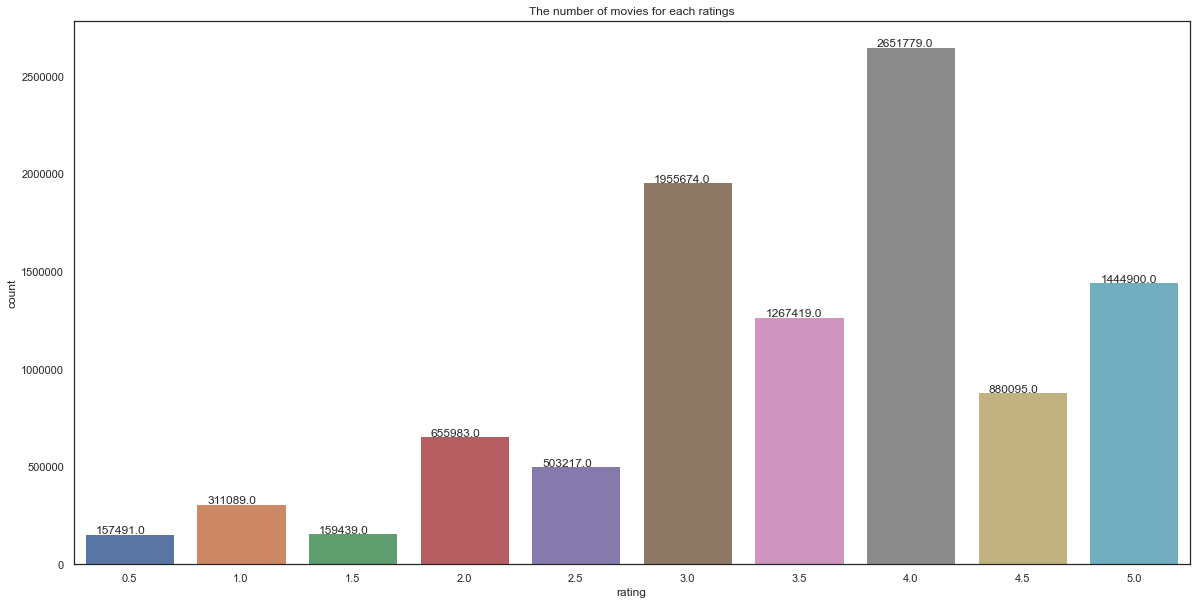

In [75]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(20, 10))

sns.countplot(ax=ax, x='rating', data=df_train_eda) 
ax.set_title("The number of movies for each ratings")
plt.ticklabel_format(style='plain', axis='y', useOffset=False) 

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    

plt.show()

>From the countplot, 60579966 movies in the dataset where rated 3.0 or above where most were rated given the rating of 4.0. Most of the movies in the data were very good considering the amount of movies that were rated 4.0 or above. With further scrutiny of the data, the observations acquired from the above chart will be explained in the next incoming sections.

### <a id="three.eight"></a> 3.8 *Creating a new dataset of average rating and number of times the users have rated movies*

In [76]:
# Create a Dataframe consisting of the users average rating the give per user and number of times they have rated movies
train1 = pd.DataFrame(df_train_eda.groupby('userId')['rating'].agg('mean').reset_index())
train2 = pd.DataFrame(df_train_eda.groupby('userId')['rating'].count().reset_index())
# Merge the above to dataframe 
train1 = train1.merge(train2,on='userId',how = 'left')
# Rename the columns respectively
train1.rename(columns={'rating_x':'avg_rating','rating_y':'number_of_movies'},inplace = True)

# Sort the data in descending of the number of movies the user has rated
train1 = train1.sort_values('number_of_movies', ascending = False)

#setting the userID as the index
train1 = train1.set_index('userId')

# Looking at the first 5 rows 
train1.head()

,avg_rating,number_of_movies
userId,,
80974,3.277582,3680
137293,3.192168,3588
33844,2.583853,3208
20055,3.179016,3050
109731,2.830026,2671


Text(0.5, 1.0, 'A Density plot showing the average number of movies watched by the users')

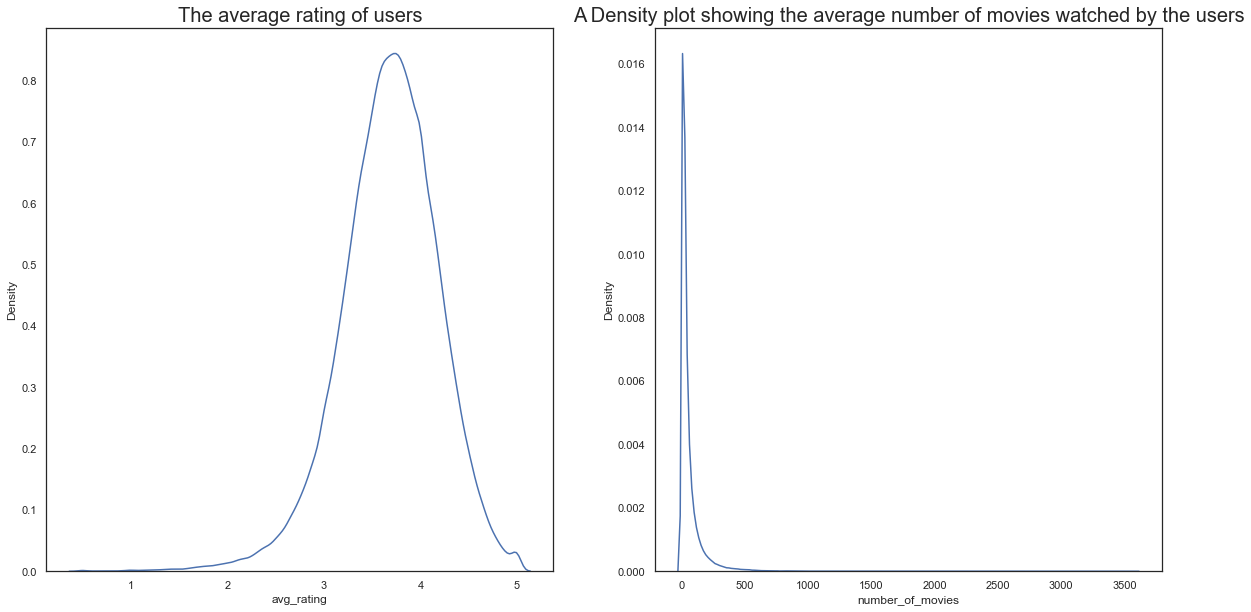

In [77]:
# Creating a Density plot showing the average number of movies watched by the users
fig, ax = plt.subplots(1,2,figsize=(20, 10)) 

sns.kdeplot(ax=ax[0], x='avg_rating', data=train1) 
ax[0].set_title("The average rating of users",fontsize = 20)


plt.ticklabel_format(style='plain', axis='y', useOffset=False) 
 
sns.kdeplot(ax=ax[1], x='number_of_movies', data=train1[1:]) 
ax[1].set_title("A Density plot showing the average number of movies watched by the users",fontsize = 20)


### <a id="three.nine"></a> 3.9 *Making a new dataframe with train dataset and the movies data set and then looking at the mean rating and number of people who voted*

In [257]:
# Merges the movie and train datasets
train_movies = df_train.merge(df_movies,on = 'movieId') 

# Drop any duplicated information 
train_movies.drop_duplicates(['title','genres'],inplace = True)

# Looking at the forst 5 rows
train_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
4253,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
8901,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),Action|Comedy|Sci-Fi
14631,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
15289,9041,366,3.0,833375837,"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)",Drama|Horror|Mystery|Thriller


In [258]:
# Create a new dataframe from the train_movies dataframe to get the average rating  
train3 = train_movies.copy()

# Get the  avarage rating for each movie in the data 
total_ratings = train_movies.groupby(['movieId','genres']).mean()['rating'].reset_index()

# Merge the the train2 and the total_ratings to create a new data 
train3 = train3.merge(total_ratings, on = 'movieId')

train3.drop(columns=['userId','rating_x','genres_y'],inplace=True) # Delete the duplicated columns

train3.rename(columns={'genres_x':'genres','rating_y':'rating'},inplace=True) # Rename the columns

# Dropping the timestamp column
train3.drop(columns=['timestamp'],inplace=True) 

# Show the  first 5 rows
train3.head()

,movieId,title,genres,rating
0,57669,In Bruges (2008),Comedy|Crime|Drama|Thriller,4.0
1,5,Father of the Bride Part II (1995),Comedy,4.5
2,5459,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),Action|Comedy|Sci-Fi,5.0
3,32296,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime,2.0
4,366,"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)",Drama|Horror|Mystery|Thriller,3.0


In [82]:
# Make a copy of the Train2 dataset
train4 = df_train_eda.copy() # Make a copy of the Train2 dataset

# Create a user dataset to check how many time it has been voted for using groupby function
user_rated = pd.DataFrame(df_train_eda['movieId'].value_counts().reset_index()) 

# Rename the columns 
user_rated.rename(columns = {'index':'movieId','movieId':'voted'},inplace = True) # Rename the columns 

# Combine the train3 dataset with the User_rated data
train4 = train4.merge(user_rated, on ='movieId') 

# Filter the data 
train4 = train4[train4['voted'] > 10] # Find the movies which have the us voted for more than 50 

# Sort the values by the rating feature
train4 = train4.sort_values('rating',ascending=False) # Sort the values by the rating feature

# Looking at the first 5 rows
train4.head() 

,movieId,userId,rating,timestamp,voted
4951604,940,39012,5.0,985573106,1534
6531511,6502,79975,5.0,1061510217,6488
2008674,1288,143804,5.0,945655025,6631
6531613,6502,124883,5.0,1457803038,6488
2008671,1288,25357,5.0,945547621,6631


### <a id="three.ten"></a> 3.10 *Looking at the top 20 best and worst rated movies*

In [ ]:
# Bar plot to see the top 20 best rated and worst rated movies from the train dataset

# Create a bar plot of the top 20 best rated movies
fig, ax  = plt.subplots(1,2,figsize=(20,10))
sns.barplot(ax=ax[0], x='rating',y = 'title', data=train4.head(20)) 
ax[0].set_title('The top 20 best rated movies ') 

# Create a bar plot of the top 10 worst rated movies
sns.barplot(ax=ax[1],x = 'rating',y = 'title', data = train4.tail(20))
ax[1].set_title('The top 20 worst rated movies') 

fig.tight_layout() 
plt.show() 

### <a id="three.eleven"></a> 3.11 *Looking at the top 20 most and least rated movies*

In [ ]:
# Plot the most rated movies and the least rated movies
train4 = train4.sort_values('voted',ascending=False)

fig, ax  = plt.subplots(1,2,figsize=(20,10)) 

# Create a bar plot of the top 20 movies
ax[0].set_title('The top 20 most rated movies ')  
sns.barplot(ax=ax[0], x='voted',y = 'title', data=train4.head(20)) 

# Create a bar plot of the top 20 worst rated movies
sns.barplot(ax=ax[1],x = 'voted',y = 'title', data = train4.tail(20)) 
ax[1].set_title('The top 20 least rated movies ') 

fig.tight_layout() 
plt.show() 


### <a id="three.twelve"></a> 3.12 *Looking at the directors of the top 20 most and least rated movies*

In [285]:
# Creating anew data frame
train5 = train4.merge(df_imdb_data, on = 'movieId')


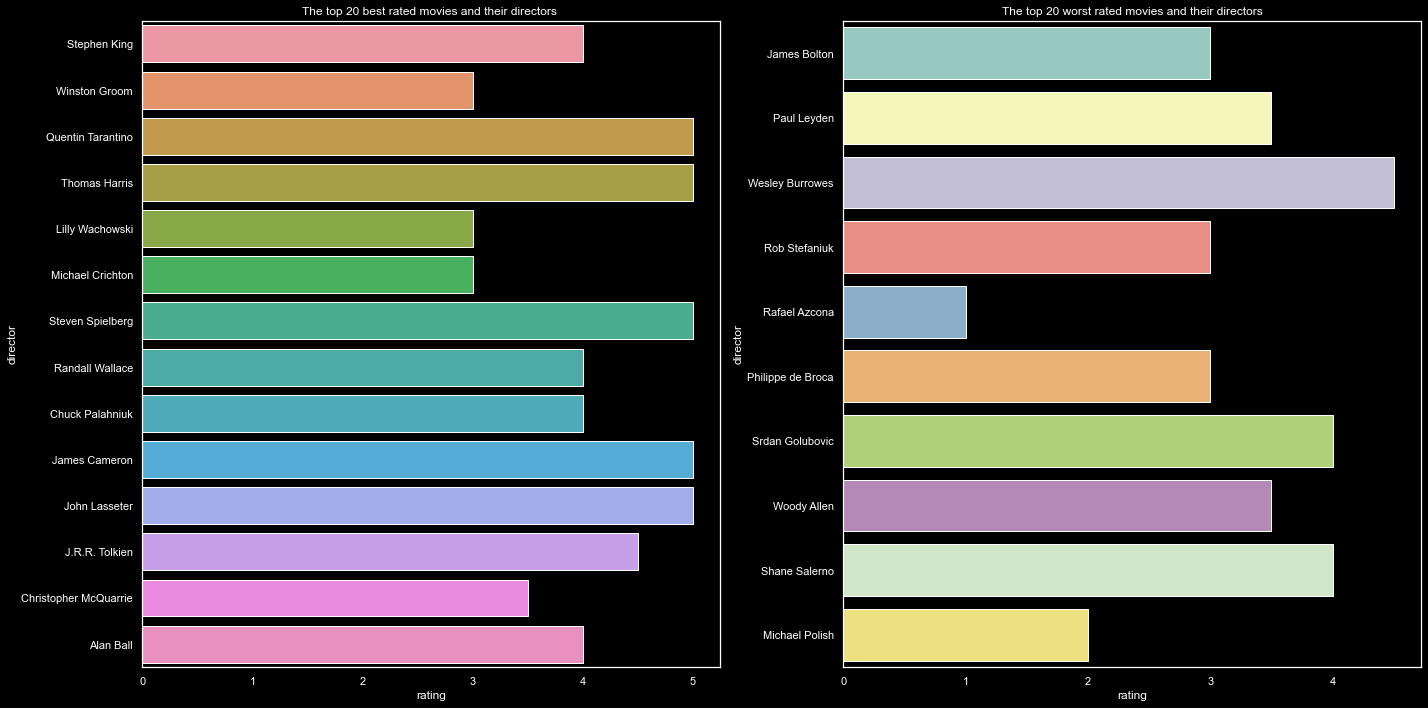

In [289]:
# Bar plot to see the top 20 best rated and worst rated movies from the train dataset

# Create a bar plot of the top 20 best rated movies
fig, ax  = plt.subplots(1,2,figsize=(20,10))
sns.barplot(ax=ax[0], x='rating',y = 'director', data=train5.head(20)) 
ax[0].set_title('The top 20 best rated movies and their directors ') 

# Create a bar plot of the top 10 worst rated movies
sns.barplot(ax=ax[1],x = 'rating',y = 'director', data = train5.tail(20))
ax[1].set_title('The top 20 worst rated movies and their directors') 

fig.tight_layout() 
plt.show() 

### <a id="three.thirteen"></a> 3.13 *Looking at the title cast of the top 20 most and least rated movies*

### <a id="three.fourteen"></a> 3.14 *Looking at the top genres*

In [85]:
def feat_extractor(df, col):
    """
    Returns a list of all unique features in a DataFrame columns separated by "|"
    """
    df.fillna("", inplace=True)
    feat_set = set()
    for i in range(len(df[f'{col}'])):
        for feat in df[f'{col}'].iloc[i].split('|'):
            feat_set.add(feat)
    return sorted([feat for feat in feat_set if feat != ""])

In [86]:
genres = feat_extractor(df_movies, 'genres')

Now lets look at which genres are the most commonly observed

In [93]:
def feature_frequency(df, column):
    """
    Function to count the number of occurences of metadata such as genre
    Parameters
    ----------
        df (DataFrame): input DataFrame containing movie metadata
        column (str): target column to extract features from
    Returns
    -------
        
    """
    # Creat a dict to store values
    df = df.dropna(axis=0)
    genre_dict = {f'{column}': list(),
                 'count': list(),}
    # Retrieve a list of all possible genres
    print('retrieving features...')
    for movie in range(len(df)):
        gens = df[f'{column}'].iloc[movie].split('|')
        for gen in gens:
            if gen not in genre_dict[f'{column}']:
                genre_dict[f'{column}'].append(gen)
    # count the number of occurences of each genre
    print('counting...')
    for genre in genre_dict[f'{column}']:
        count = 0
        for movie in range(len(df)):
            gens = df[f'{column}'].iloc[movie].split('|')
            if genre in gens:
                count += 1
        genre_dict['count'].append(count)
        
        # Calculate metrics
    data = pd.DataFrame(genre_dict)
    print('done!')
    return data
genres = feature_frequency(df_movies, 'genres')

retrieving features...
counting...
done!


In [94]:
def feature_count(df, column):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(y = df[f'{column}'], x = df['count'], palette='brg', orient='h')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.ylabel(f'{column}')
    plt.xlabel('Count')
    plt.show()

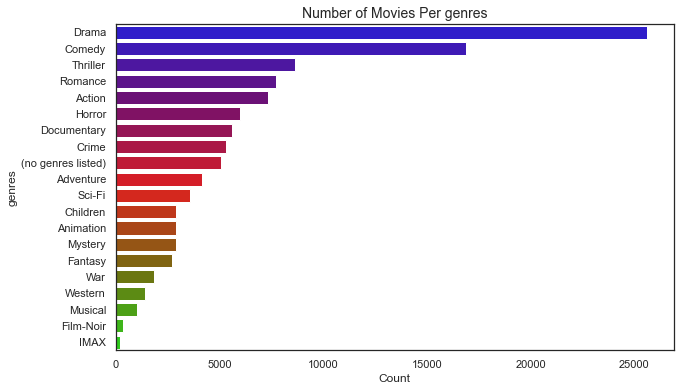

In [95]:
feature_count(genres.sort_values(by = 'count', ascending=False), 'genres')

Drama is the most frequently occuring genre in the database. Approximately 5000 movies have missing genres. We can use the IMDB and TMDB ID's together with the APIs to fill missing data. Further, IMAX is not a genre but rather a proprietary system for mass-viewings.

The above figure does not tell us anything about the popularity of the genres, lets calculate a mean rating and append it to the data

In [99]:
def mean_calc(feat_df, ratings = df_train_eda, movies = df_movies, metadata = df_imdb_data, column = 'genres'):
    mean_ratings = pd.DataFrame(ratings.merge(movies, on='movieId', how='left').groupby(['movieId'])['rating'].mean())
    movie_eda = movies.copy()
    movie_eda = movie_eda.join(mean_ratings, on = 'movieId', how = 'left')

    # Exclude missing values
    movie_eda = movie_eda
    movie_eda2 = movie_eda[movie_eda['rating'].notnull()]

    means = []
    for feat in feat_df[f'{column}']:
        mean = round(movie_eda2[movie_eda2[f'{column}'].str.contains(feat)]['rating'].mean(),2)
        means.append(mean)
    return means

In [100]:
genres['mean_rating'] = mean_calc(genres)

In [101]:
genres.sort_values('mean_rating', ascending=False).head(5)

,genres,count,mean_rating
14,Documentary,5605,3.40
18,Film-Noir,353,3.39
15,War,1874,3.30
13,IMAX,195,3.25
6,Drama,25606,3.23


Film-Noir(French: “dark film”) describes Hollywood crime dramas, particularly those that emphasize cynical attitudes and sexual motivations. The 1940s and 1950s are generally regarded as the "classic period" of American film-noir. These movies have the highest ratings but this may be as a result of it's niche audence. The same logic can be applied to IMAX movies, as such, we will only include genres with a count of 500 or more.

In [102]:
def genre_popularity(df):
    """
    Plots the mean rating per genre.
    """
    count_filt = 500
    plt.figure(figsize=(10,6))
    plot_data = df[df['count']>count_filt]
    mean = plot_data['mean_rating'].mean()
    min_ = plot_data['mean_rating'].min()
    max_ = plot_data['mean_rating'].max()
    sns.barplot(y = plot_data['genres'], x = plot_data['mean_rating'], order = plot_data['genres'], orient='h',palette='brg')
    plt.axvline(x=mean, label = f'mean {round(mean,1)}' , color='black', lw=1, ls ='--')
    plt.axvline(x=min_, label = f'min {round(min_,1)}' , color='#4D17A0', lw=1, ls = '--')
    plt.axvline(x=max_, label = f'max {max_}' , color='#4DA017', lw=1,ls = '--')
    plt.title(f'Mean Rating Per Genre', fontsize=14)
    plt.ylabel('Genre')
    plt.xlabel('Mean Rating')
    plt.legend(loc='lower center')
    plt.show()

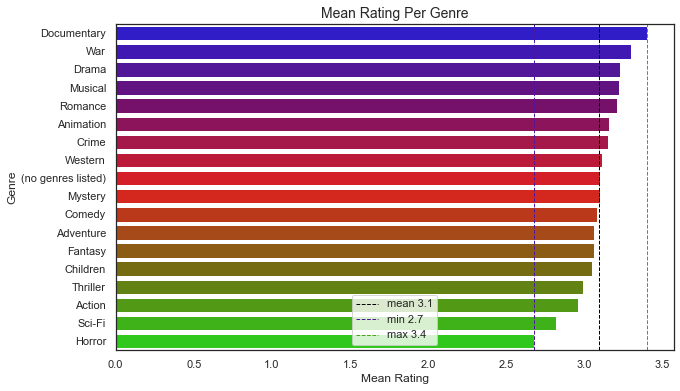

In [103]:
genre_popularity(genres.sort_values('mean_rating', ascending=False))

The scores are almost evenly distributed with the exceptions of Documentaries, War, Drama, Musicals, and Romance and Thriller, Action, Sci-Fi, and Horror, which rate higher than average and far below average respectively

<a id="four"></a>

# **4. Data Engineering**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|  *Description: Data engineering*  |
| :--------------------------- |
| 
>In this section the dataset will be cleaned and possible new new features created - as identified in the EDA phase. |

---


### <a id="four.one"></a> 4.1 *Removing Null values from imbd,links and tags datasets.*

In [105]:

# Removing Null values from Tags datasets
df_tags = df_tags.dropna()

# Removing Null values from imbd datasets
df_links = df_links.dropna()

# Removing Null values from links datasets
df_imdb_data = df_imdb_data.dropna()

In [106]:

# Checking to see if Null values have been removed from tags dataset
df_tags.isnull().sum()


userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [107]:
# Checking to see if Null values have been removed from links dataset
df_links.isnull().sum()


movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [108]:

# Checking to see if Null values have been removed from imdb dataset
df_imdb_data.isnull().sum()

movieId          0
title_cast       0
director         0
runtime          0
budget           0
plot_keywords    0
dtype: int64

> We can see that all the null values have been removed from the imbd,links and tags datasets

### <a id="four.two"></a> 4.2 *Looking at the unique currencies for the budget column from imdb dataset*

In [109]:
# Looking at the budget column in the imdb dataset
df_budget= df_imdb_data.sort_values(by='budget',ascending=False)
print(df_budget.budget)

23579      VEB4,273,248
24673     TWD50,000,000
13436      TRL1,200,000
7136     THB400,000,000
13548    THB300,000,000
              ...      
3822         $1,000,000
1328         $1,000,000
26286        $1,000,000
25021        $1,000,000
19564            $1,000
Name: budget, Length: 6963, dtype: object


In [110]:
# Lookign at unique values in the budget colum
budget_movies= df_imdb_data.sort_values(by='budget',ascending =False)
print(budget_movies.budget.str[0:3].unique())

['VEB' 'TWD' 'TRL' 'THB' 'SGD' 'SEK' 'RUR' 'PTE' 'PLN' 'PHP' 'NZD' 'NOK'
 'NLG' 'NGN' 'MYR' 'MXN' 'LVL' 'KRW' 'JPY' 'ITL' 'ISK' 'INR' 'ILS' 'IDR'
 'HUF' 'HKD' 'GBP' 'FRF' 'FIM' 'EUR' 'ESP' 'DKK' 'DEM' 'CZK' 'CNY' 'CLP'
 'CHF' 'CAD' 'BRL' 'BND' 'BGL' 'BEF' 'AUD' 'ATS' 'ARS' '$99' '$98' '$95'
 '$94' '$93' '$92' '$90' '$9,' '$88' '$87' '$86' '$85' '$84' '$83' '$82'
 '$81' '$80' '$8,' '$79' '$78' '$76' '$75' '$74' '$73' '$72' '$71' '$70'
 '$7,' '$69' '$68' '$67' '$66' '$65' '$64' '$63' '$62' '$61' '$60' '$6,'
 '$6' '$59' '$58' '$57' '$56' '$55' '$54' '$53' '$52' '$51' '$50' '$5,'
 '$5' '$49' '$48' '$47' '$46' '$45' '$44' '$43' '$42' '$41' '$40' '$4,'
 '$4' '$39' '$38' '$37' '$36' '$35' '$34' '$33' '$32' '$31' '$30' '$3,'
 '$29' '$28' '$27' '$26' '$25' '$24' '$23' '$22' '$21' '$20' '$2,' '$19'
 '$18' '$17' '$16' '$15' '$14' '$13' '$12' '$11' '$10' '$1,']


> We can see that there are different currencies in the budget column

In [ ]:
### TRYING TO CONVERT ALL CURRENCIES

def convert(value):
    #SPLIT VALUES
    currency, money = value.split(" ")
    money = int(money)

    ret = ""
    #Don't do anyhting if its already in USD 
    if currency == "$":
        return value
    else:
        try:
          money = c.convert(money, currency, 'USD', date=date(2023, 11, 20))
          return "$ " + str(money)
        except:
          print(currency + " is unsupported")
          return value

df_imdb_data["budget"] = df_imdb_data["budget"].apply(convert)

### <a id="four.three"></a> 4.3 *Removing the "|" between words in the genres column in the movie dataset*

In [112]:
# Removing "|" in the genres column from movie dataset
def remove_pipe(string):
    return string.replace("|", ",").split(",")

# Apply the function to the 'cast' column
df_movies['genres'] = df_movies['genres'].apply(remove_pipe)


In [114]:
# Checking to see the "|" has been removed from the genres column
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


### <a id="four.four"></a> 4.4 *Extracting the year from the title column*

In [115]:
# Function to extract year from tilte column
def extract_year(string):
    string = string.strip()
    year = re.findall(r'\s?\((\d{4})\)$', string)
    
    try :
        return year[0]
    except IndexError:
        return "0"


In [117]:
# Applying the function to the movies dataset
df_movies["year"] = df_movies["title"].apply(extract_year)
df_movies["year"] = df_movies["year"].astype("int64")
df_movies['title'] = df_movies.title.str.replace('(\(\d\d\d\d\))', '')

In [118]:
# Checking the first 5 rows of the dataset after extracting the year from the title and adding year as a seperate column
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


### <a id="four.four"></a> 4.4 *Removing the "|" between words in the title cast and plot keywords columns in the imdb dataset*

In [123]:
# Removing "|" in the title_cast column from imdb dataset
df_imdb_data["title_cast"] = df_imdb_data["title_cast"].apply(remove_pipe)

In [124]:
# Removing "|" in the plot_keywords column from imdb dataset
df_imdb_data["plot_keywords"] = df_imdb_data["plot_keywords"].apply(remove_pipe)

In [125]:
# Creating new column for movies and their ratings by combining movie dataset and train dataset
df_movie_R = pd.merge(df_movies,df_train_eda,on='movieId', how = 'inner')

# Droping the time stamp column from the dataset
df_movie_R = df_movie_R.drop('timestamp', axis = 1)

# Ordering the columns
df_movie_R = df_movie_R[['movieId','userId','title','year','genres','rating']]

# Checking first 5 rows of dataset
print(df_movie_R.head() )



   movieId  userId       title  year  \
0        1  158849  Toy Story   1995   
1        1   97203  Toy Story   1995   
2        1  161871  Toy Story   1995   
3        1   45117  Toy Story   1995   
4        1   27431  Toy Story   1995   

                                              genres  rating  
0  [Adventure, Animation, Children, Comedy, Fantasy]     5.0  
1  [Adventure, Animation, Children, Comedy, Fantasy]     5.0  
2  [Adventure, Animation, Children, Comedy, Fantasy]     3.0  
3  [Adventure, Animation, Children, Comedy, Fantasy]     4.0  
4  [Adventure, Animation, Children, Comedy, Fantasy]     5.0  


### <a id="four.five"></a> 4.5  *Finding the mean rating for each title*

>The graph is bell shaped which means that the rating data is normally distributed


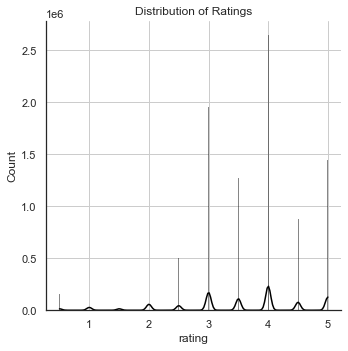

In [131]:
# lets look at the Distribution of Ratings across the Movies
rating_data = pd.DataFrame(train_movies.groupby(by='title')['rating'].mean())

sns.displot(x=rating_data['rating'], color = 'black',kde=True,height=5)
plt.title('Distribution of Ratings')
plt.grid()

### <a id="four.ten"></a> 4.10  *Line Graph showing number of movies released by year*

### <a id="four.eleven"></a> 4.11  *Looking at run times of movies*

In [128]:
# Looking at the unique valuesof run time of movies
df_imdb_data['runtime'].unique()

runtimes = []

for runtime in df_imdb_data['runtime']:
    if runtime < 50:
        runtimes.append('Short')
    elif runtime < 80:
        runtimes.append('Below minimum')
    elif runtime < 180:
        runtimes.append('Feature-length')
    elif runtime < 300:
        runtimes.append('Long')
    elif runtime >= 300:
        runtimes.append('VLMS')
    else:
        runtimes.append('No Info')
        
df_imdb_data['feature_length'] = runtimes




(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Feature-length'),
  Text(1, 0, 'Long'),
  Text(2, 0, 'Below minimum'),
  Text(3, 0, 'VLMS'),
  Text(4, 0, 'Short')])

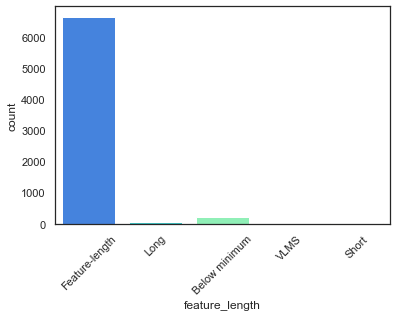

In [129]:
sns.countplot(df_imdb_data['feature_length'], palette='rainbow')
plt.xticks(rotation=45)

### <a id="four.twelve"></a> 4.12  *Distribution of run time for feature length films*

Text(0.5, 0, 'Runtime in Minutes')

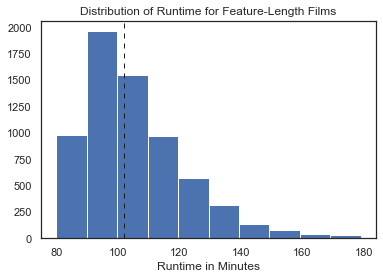

In [130]:
feature_length = df_imdb_data[df_imdb_data['feature_length'] == 'Feature-length']

plt.hist(feature_length['runtime'])
plt.axvline((feature_length['runtime'].median()), color='k', dashes=[5,5] , linewidth=1) #Create reference line
plt.title('Distribution of Runtime for Feature-Length Films')
plt.xlabel('Runtime in Minutes')

In [ ]:
df_imdb_data['title_cast'] = df_imdb_data['title_cast'].apply(lambda x: str(x).lower())
casts = df_imdb_data['title_cast']

text = ' '.join(casts) 

In [ ]:
word = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(text)

plt.figure(figsize=(12,7))
plt.imshow(word, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id="five"></a>

# **5. Modelling**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| *Description: Modelling*  |
| :--------------------------- |
| 
>In this section models will be built,namley: . |

---

In [ ]:
#Training model on a small set of data to view performance: on 300000
train_subset = df_train[:300000]
train_subset.info()

### Collaborative Filtering

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user .

### Algorithm 1 SVD

The Singular Value Decomposition algorithm is a matrix factorization technique which reduces the number of features of a dataset and was popularized by Simon Funk during the [Neflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize)In the matrix structure, each row represents a user and each column represents a movie. The matrix elements are ratings that are given to movies by users.




In [ ]:
# Define the SVD algorithm
svd_algo = SVD()

 ### Algorithm 2 Non-negative Matrix Factorization (NMF) 

NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. The optimization procedure is a (regularized) stochastic gradient descent with a specific choice of step size that ensures non-negativity of factors, provided that their initial values are also positive.

In [ ]:
# Define the NMF algorithm
nmf_algo = NMF()

### Algorithm3 BaselineOnly  
The Baseline Only algorithm predicts the baseline estimate for a given user and movie. A baseline is calculated using either Stochastic Gradient Descent (SGD) or Alternating Least Squares (ALS).

In [ ]:
bsl_options = {'method': 'sgd','n_epochs': 50}
blo_test = BaselineOnly(bsl_options=bsl_options)

### Algorithm 4: SVD pp

In [ ]:
svd_test = SVD()

In [ ]:
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max())) #running reader

In [ ]:
# Load the data into the surprise format
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader) 

### Cross Validation

Cross validation is a technique used to test the accuracy of a model's prediction on unseen data (validation sets). This is important because it can assist in picking up issues such as over/underfitting and selection bias. We used the K-fold technique to perform cross validation on our two best perfoming models, i.e. **SVD** and **BaselineOnly**.

In [ ]:
# Evaluate the NMF algorithm using cross-validation
nmf_cv_results = cross_validate(nmf_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
# Evaluate the SVD algorithm using cross-validation
svd_cv_results = cross_validate(svd_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
# Evaluate the SVD algorithm using cross-validation
blo_test_results = cross_validate(blo_test, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
# Evaluate the SVD algorithm using cross-validation
svd_pp_results = cross_validate(svd_pp, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
# Check our predictions with this model on subset data
trainset = data.build_full_trainset()
svd_algo.fit(trainset)

In [ ]:
#prediction is made for user ID 5 and movie ID row 1
svd_algo.predict(5, 1, 3)

## Train-test split

In [ ]:
# Test sample is made of 10% of the subset data
trainset, testset = train_test_split(data, test_size=0.10, random_state=42)

In [ ]:
# Train the algorithm on the trainset, and predict ratings for the testset
svd_algo.fit(trainset)
svd_pred = svd_algo.test(testset)

# Compute RMSE
svd_rmse = accuracy.rmse(svd_pred)

In [ ]:
# Fit the NMF algorithm on the train set and make predictions on the test set
nmf_algo.fit(trainset)
nmf_predictions = nmf_algo.test(testset)

# Calculate NMF RMSE
nmf_rmse = accuracy.rmse(nmf_predictions)

In [ ]:
blo_test.fit(trainset)
predictions = blo_test.test(testset)
# Calculate RMSE
blo_rmse = accuracy.rmse(predictions)

In [ ]:
svd_test.fit(trainset)
predictions = svd_test.test(testset)

# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

### <a id="seven.one"></a> 7.1 *Best Performing Model:*

In [ ]:
# Train best model on whole train dataset (10 million entries)
reader1 = Reader(rating_scale = (df_train['rating'].min(), df_train['rating'].max()))
data1 = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader1)
trainset1 = data1.build_full_trainset()
svd = SVD(n_epochs = 20, n_factors = 400, init_std_dev = 0.001, random_state=42, verbose=True)
svd.fit(trainset1)

<a id="five"></a>

# **8.Kaggle submission file**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# Create Kaggle submission file
# Make a predictions list that runs our model on our unseen data
predictions = []
for i, row in df_test.iterrows():
    x = (svd_test.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
    
# Concatenate the userId and movieId column into one column, named 'Id' 
df_test['Id'] = df_test['userId'].map(str) +'_'+ df_test['movieId'].map(str)

In [ ]:
# Converting our results in a dataframe format 
results = pd.DataFrame({"Id":df_test['Id'],"rating": predictions})
results.head()

In [ ]:
# Exporting our csv submission file
results.to_csv("Team_ES2_Submission-6.csv", index=False)

### <a id="seven.two"></a> 7.2 *Conclusion*

### <a id="seven.three"></a> 7.3 *Refrence list*